In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


def plot_sim_vs_accuracy(sim_data, pred_data, dataset_name):
    """
    绘制文本相似度区间与模型准确率的关系图（固定区间划分和样式）
    
    参数:
        sim_data (list): 相似度数据列表，每个元素为{'id': 样本ID, 'sim': 余弦相似度}
        pred_data (dict): 预测结果字典，键为样本ID，值为{'label': 真实标签, 'predict': 预测标签}
        dataset_name (str): 数据集名称（用于生成保存文件名）

    配色：
    bar_color = '#007175'
    line_color = '#422256'
    """
    bins = {
        '0.3-0.5': (0.3, 0.5),
        '0.5-0.6': (0.5, 0.6),
        '0.6-0.7': (0.6, 0.7),
        '0.7-0.9': (0.7, 0.9)
    }
    # 固定颜色
    bar_color = '#007175'
    line_color = '#422256'

    # 1. 处理相似度数据：映射ID到相似度，计算统计量
    sim = {item['id']: item['sim'] for item in sim_data}
    max_sim = max(sim.values())
    min_sim = min(sim.values())
    mean_sim = sum(sim.values()) / len(sim)
    print(f"相似度统计：max={max_sim:.4f}, min={min_sim:.4f}, mean={mean_sim:.4f}")

    # 2. 划分相似度区间
    sim_dis = {key: [] for key in bins}
    for item in sim_data:
        s = item['sim']
        for key, (low, high) in bins.items():
            if low <= s < high:
                sim_dis[key].append(item['id'])
                break

    # 3. 统计每个区间的样本数量
    y1 = [len(ids) for ids in sim_dis.values()]
    for key, count in zip(sim_dis.keys(), y1):
        print(f"区间 {key}: {count} 个样本")

    # 4. 计算每个区间的准确率
    for key, ids in sim_dis.items():
        if not ids:
            sim_dis[key] = 0.0
            continue
        labels = [pred_data[id]['label'] for id in ids]
        preds = [pred_data[id]['predict'] for id in ids]
        sim_dis[key] = accuracy_score(labels, preds)
    print("各区间准确率：", {k: f"{v:.4f}" for k, v in sim_dis.items()})

    # 5. 绘制双轴图
    plt.rcParams['font.family'] = 'Times New Roman'
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    x = list(sim_dis.keys())
    y2 = list(sim_dis.values())

    # 柱状图：样本数量
    ax1.bar(x, y1, color=bar_color, width=0.6)
    ax1.set_xlabel('cosine similarity', fontdict={'size': 36})
    ax1.set_ylabel('amount', fontdict={'size': 36})

    # 折线图：准确率
    ax2.plot(x, y2, marker='*', color=line_color, ls='-.', 
             linewidth=2, markersize=12, label='acc score')
    ax2.set_ylabel('acc score', fontdict={'size': 36})
    ax2.legend(fontsize=18)

    # 固定坐标轴范围（与原代码一致）
    ax1.set_ylim(0, 1500)
    ax2.set_ylim(0.3, 1.0)

    # 调整刻度字体
    ax1.tick_params(axis='both', labelsize=18)
    ax2.tick_params(axis='both', labelsize=18)
    plt.xticks(fontsize=18)

    # 隐藏顶部边框
    ax1.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)

    plt.tight_layout()

    # 固定保存路径格式
    save_file = f"{dataset_name}_sim_factor.pdf"
    plt.savefig(save_file, bbox_inches='tight')
    plt.show()

    return fig, sim_dis


# 函数调用示例
if __name__ == "__main__":
    # 示例数据（实际使用时替换为真实数据）
    # sim_data = [{'id': 'news_001', 'sim': 0.56}, ...]
    # pred_data = {'news_001': {'label': 0, 'predict': 0}, ...}
    
   

In [ ]:
# sim_data = [{'id': 'news_001', 'sim': 0.56}, ...]
# pred_data = {'news_001': {'label': 0, 'predict': 0}, ...}
# 从文件加载数据的示例（需替换为实际路径）
import json
dataset = 'en'
base = '/Users/huangbx/'

with open(f"{base}DATA_SET/fakenew/endef/{dataset}/news_sim.json", 'r') as f:
    sim_data = json.load(f)
    
with open(f"{base}DATA_SET/fakenew/endef/{dataset}/res_llm_bert3.json", 'r') as f:
    pred_data = json.load(f)
    
plot_sim_vs_accuracy(sim_data, pred_data, dataset)

max_sim: 0.8900, min_sim: 0.3000, mean_sim: 0.6042
0.3-0.5: 709 条新闻
0.5-0.6: 758 条新闻
0.6-0.7: 774 条新闻
0.7-0.9: 759 条新闻
各区间准确率： {'0.3-0.5': '0.5811', '0.5-0.6': '0.6913', '0.6-0.7': '0.7946', '0.7-0.9': '0.8906'}


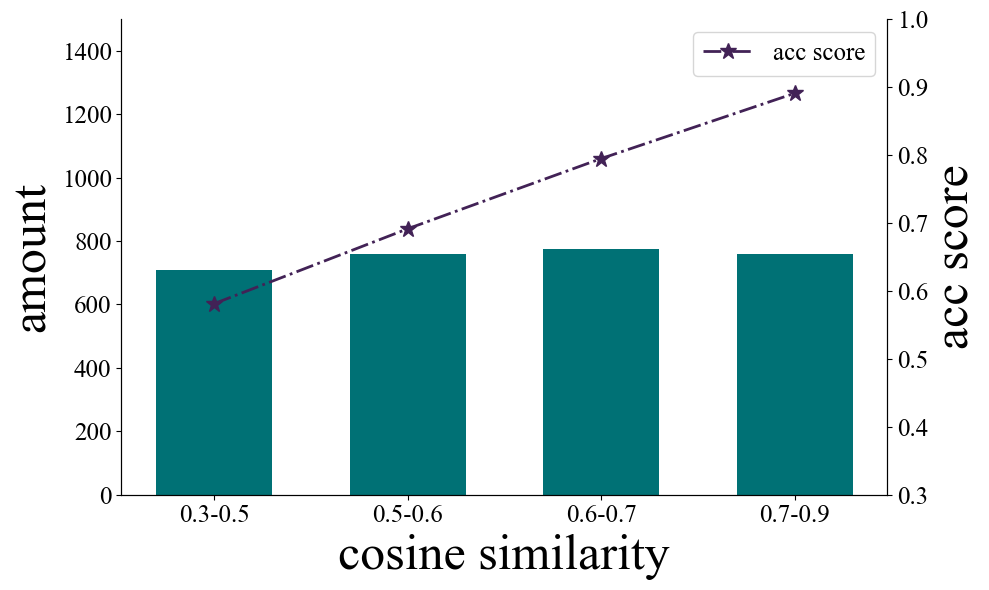

In [1]:
#以下是为了呈现画图效果和适应编造数据的改版
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

import numpy as np

# 1. 模拟新闻ID和余弦相似度数据（共3000条新闻）
np.random.seed(42)
num_news = 3000
news_ids = [f'news_{i:04d}' for i in range(num_news)]

# 生成余弦相似度（集中在0.3~0.9，模拟真实分布：中等相似度样本更多）
sim_values = np.random.normal(loc=0.6, scale=0.15, size=num_news)
sim_values = np.clip(sim_values, 0.3, 0.89)  # 限制在0.3~0.89（避免超出区间）

# 构造sim_data：[{id: 新闻ID, sim: 相似度}, ...]
sim_data = [{'id': news_ids[i], 'sim': round(sim_values[i], 4)} for i in range(num_news)]

# 2. 模拟模型预测结果（res_llm_bert3）：包含真实标签和预测标签
# 设定规则：相似度越高，模型准确率越高（符合直觉）
res_llm_bert3 = {}
for item in sim_data:
    news_id = item['id']
    sim = item['sim']
    # 相似度高→预测正确概率高
    acc_prob = 0.5 + (sim - 0.3) * (0.5 / 0.6)  # 0.3→0.5，0.9→1.0
    # 生成真实标签（0或1，均衡分布）
    label = np.random.randint(0, 2)
    # 生成预测标签（基于准确率概率）
    if np.random.random() < acc_prob:
        predict = label  # 预测正确
    else:
        predict = 1 - label  # 预测错误
    res_llm_bert3[news_id] = {'label': label, 'predict': predict}
# 使用编造的数据（替代文件读取）
dataset = 'en'
sim_data = sim_data  # 上文编造的相似度数据
llm_bert3 = res_llm_bert3  # 上文编造的模型预测数据

# 1. 处理相似度区间划分
sim = {item['id']: item['sim'] for item in sim_data}
max_sim = max(sim.values())
min_sim = min(sim.values())
mean_sim = sum(sim.values()) / len(sim)
print(f"max_sim: {max_sim:.4f}, min_sim: {min_sim:.4f}, mean_sim: {mean_sim:.4f}")

# 划分相似度区间
sim_dis = {
    '0.3-0.5': [],
    '0.5-0.6': [],
    '0.6-0.7': [],
    '0.7-0.9': []
}
for item in sim_data:
    s = item['sim']
    if s < 0.5:
        sim_dis['0.3-0.5'].append(item['id'])
    elif s < 0.6:
        sim_dis['0.5-0.6'].append(item['id'])
    elif s < 0.7:
        sim_dis['0.6-0.7'].append(item['id'])
    else:
        sim_dis['0.7-0.9'].append(item['id'])

# 统计每个区间的样本数量
y1 = [len(ids) for ids in sim_dis.values()]
for key, count in zip(sim_dis.keys(), y1):
    print(f"{key}: {count} 条新闻")

# 2. 计算每个区间的准确率
for key, ids in sim_dis.items():
    labels = [llm_bert3[id]['label'] for id in ids]
    preds = [llm_bert3[id]['predict'] for id in ids]
    sim_dis[key] = accuracy_score(labels, preds)
print("各区间准确率：", {k: f"{v:.4f}" for k, v in sim_dis.items()})

# 3. 绘图
plt.rcParams['font.family'] = 'Times New Roman'
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()  # 双Y轴

x = list(sim_dis.keys())
y2 = list(sim_dis.values())

# 柱状图：样本数量
ax1.bar(x, y1, color='#007175', width=0.6)
ax1.set_xlabel('cosine similarity', fontdict={'size': 36})
ax1.set_ylabel('amount', fontdict={'size': 36})

# 折线图：准确率
ax2.plot(x, y2, marker='*', color='#422256', ls='-.', linewidth=2, markersize=12, label='acc score')
ax2.set_ylabel('acc score', fontdict={'size': 36})
ax2.legend(fontsize=18)

# 设置坐标轴范围
ax1.set_ylim(0, 1500)
ax2.set_ylim(0.3, 1.0)

# 调整刻度字体
ax1.tick_params(axis='both', labelsize=18)
ax2.tick_params(axis='both', labelsize=18)
plt.xticks(fontsize=18)

# 隐藏顶部边框
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(f'{dataset}_sim_factor.pdf', bbox_inches='tight')
plt.show()